In [1]:
from io import StringIO
from datetime import datetime

from requests_html import HTMLSession
import pandas as pd
from jupyter_dash import JupyterDash
import dash_core_components as dcc 
import dash_html_components as html 
import plotly.express as px

## 家計調査のデータを読み込み、加工し、可視化する
- https://www.stat.go.jp/data/kakei/longtime/index.html#time
- 小分類まで支出金額
- まずは読み込みます

In [2]:
df = pd.read_csv('https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv')

In [3]:
df

Empty DataFrame
Columns: [<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 6133672767595396610</body></html>]
Index: []

### 読み込めたかと思いきや、読み込めていなかった
- どうする？
- ググる
- スクレイピングツールで読む
    - [requests_html](http://requests-html.kennethreitz.org/)
    - 大分前にはんなりPythonでハンズオンをした(https://github.com/hannari-python/scraping-sep)


In [4]:
session = HTMLSession()
r = session.get('https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv')


In [5]:
r.text[:100]

'\x93ñ\x90l\x88È\x8fã\x82Ì\x90¢\x91Ñ_\x8ex\x8fo\x8bà\x8az[\x89~],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2'

### コンマ区切りされた文字列が出現
- 数値は認識されているっぽい
- 文字は化けているようだ

In [6]:
print(r.encoding)

ISO-8859-1


In [7]:
r.encoding = 'utf-8'

In [8]:
print(r.encoding)

utf-8


In [9]:
r.text[:100]

'��l�ȏ�̐���_�x�o���z[�~],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27'

In [10]:
r.encoding = 'shift_jis'
print(r.encoding)

shift_jis


In [11]:
r.text[:100]

'二人以上の世帯_支出金額[円],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,3'

### 日本語化できた
- 次にCSVをデータフレームとして読み込みます
- StringIOで
- read_csv関数を使う

In [12]:
data = StringIO(r.text)
df = pd.read_csv(data)

In [13]:
df.head()

二人以上の世帯_支出金額[円] Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4    Unnamed: 5  \
0             NaN        NaN        NaN        NaN        NaN           NaN   
1             NaN        NaN        NaN        NaN        NaN           NaN   
2            表側連番         階層        大分類        中分類        小分類          品目分類   
3               1          -          -          -          -  世帯数分布(抽出率調整)   
4               2          -          -          -          -         集計世帯数   

         1      2      3      4  ...    236    237    238    239    240  \
0    2000年    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
1  (平成12年)    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
2       1月     2月     3月     4月  ...     8月     9月    10月    11月    12月   
3    10000  10000  10000  10000  ...  10000  10000  10000  10000  10000   
4     7887   7942   7934   7922  ...   7479   7517   7470   7466   7481   

      241    242    243    244    245  
0   2020年    NaN    NaN    NaN    NaN  
1  (令和2年)    NaN    NaN    NaN    NaN  
2      1月     2月     3月     4月     5月  
3   10000  10000  10000  10000  10000  
4    7443   7475   7489   7534   7430  

[5 rows x 251 columns]

In [14]:
df1 = pd.read_csv(r.text)

ValueError: stat: path too long for Windows

In [15]:
data.read()

''

In [16]:
dir(data)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'getvalue',
 'isatty',
 'line_buffering',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

In [17]:
help(StringIO().tell)

Help on built-in function tell:

tell() method of _io.StringIO instance
    Tell the current file position.



## どうやったら自分の使いやすいデータを作れるか、ちょっとデータを眺めてみる
- pandasはデータが多いとはしょってデータを出すので、その設定を変更する
    - 全部出たらうざいってのはあるけど
- そのあと方針を決定

In [18]:
df.shape

(188, 251)

In [19]:
pd.set_option('max_columns', 300)
pd.set_option('max_rows', 300)

In [20]:
df.head()

二人以上の世帯_支出金額[円] Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4    Unnamed: 5  \
0             NaN        NaN        NaN        NaN        NaN           NaN   
1             NaN        NaN        NaN        NaN        NaN           NaN   
2            表側連番         階層        大分類        中分類        小分類          品目分類   
3               1          -          -          -          -  世帯数分布(抽出率調整)   
4               2          -          -          -          -         集計世帯数   

         1      2      3      4      5      6      7      8      9     10  \
0    2000年    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  (平成12年)    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2       1月     2月     3月     4月     5月     6月     7月     8月     9月    10月   
3    10000  10000  10000  10000  10000  10000  10000  10000  10000  10000   
4     7887   7942   7934   7922   7928   7917   7907   7908   7917   7937   

      11     12       13     14     15     16     17     18     19     20  \
0    NaN    NaN    2001年    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN  (平成13年)    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    11月    12月       1月     2月     3月     4月     5月     6月     7月     8月   
3  10000  10000    10000  10000  10000  10000  10000  10000  10000  10000   
4   7914   7933     7888   7887   7907   7927   7948   7924   7907   7909   

      21     22     23     24       25     26     27     28     29     30  \
0    NaN    NaN    NaN    NaN    2002年    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN  (平成14年)    NaN    NaN    NaN    NaN    NaN   
2     9月    10月    11月    12月       1月     2月     3月     4月     5月     6月   
3  10000  10000  10000  10000    10000  10000  10000  10000  10000  10000   
4   7910   7908   7914   7924     7857   7877   7915   7894   7932   7926   

      31     32     33     34     35     36       37     38     39     40  \
0    NaN    NaN    NaN    NaN    NaN    NaN    2003年    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN  (平成15年)    NaN    NaN    NaN   
2     7月     8月     9月    10月    11月    12月       1月     2月     3月     4月   
3  10000  10000  10000  10000  10000  10000    10000  10000  10000  10000   
4   7914   7893   7914   7933   7905   7932     7850   7879   7917   7911   

      41     42     43     44     45     46     47     48       49     50  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    2004年    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  (平成16年)    NaN   
2     5月     6月     7月     8月     9月    10月    11月    12月       1月     2月   
3  10000  10000  10000  10000  10000  10000  10000  10000    10000  10000   
4   7922   7925   7921   7913   7912   7930   7917   7943     7875   7898   

      51     52     53     54     55     56     57     58     59     60  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     3月     4月     5月     6月     7月     8月     9月    10月    11月    12月   
3  10000  10000  10000  10000  10000  10000  10000  10000  10000  10000   
4   7890   7884   7916   7911   7892   7915   7885   7883   7887   7911   

        61     62     63     64     65     66     67     68     69     70  \
0    2005年    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  (平成17年)    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2       1月     2月     3月     4月     5月     6月     7月     8月     9月    10月   
3    10000  10000  10000  10000  10000  10000  10000  10000  10000  10000   
4     7826   7878   7862   7881   7915   7901   7893   7910   7905   7913   

      71     72       73     74     75     76     77     78     79     80  \
0    NaN    NaN    2006年    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN  (平成18年)    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    11月    12月       1月     2月     3月     4月     5月     6月     7月 

### 前処理方針
- ひとまず、年月のデータを作成する
- 今回は品目分類だけで管理する

In [21]:
year = df.iloc[0, :]
year_list = [int(year.replace('年', '')) for year in year.dropna()]
year_list

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [22]:
# 最後の月を取得する
df.iloc[2, -1]

' 5月'

In [23]:
pd.date_range('2020', freq='M', periods=5)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [24]:
month_counts = (len(year_list) - 1) * 12 + int(df.iloc[2, -1].replace('月', ''))

In [25]:
pd.date_range('2000', freq="M", periods=month_counts)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31'],
              dtype='datetime64[ns]', length=245, freq='M')

In [26]:
date_list1 = pd.Series(pd.date_range('2000', freq="M", periods=245))
date_list1.head()

0   2000-01-31
1   2000-02-29
2   2000-03-31
3   2000-04-30
4   2000-05-31
dtype: datetime64[ns]

In [27]:
date_list2 = []

for year in year_list:
    for month in range(1,13):
        if year == 2020:
            if month == 6:
                break
        date_list2.append(datetime(year, month, 1))

In [28]:
date_list2[-10:]

[datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 9, 1, 0, 0),
 datetime.datetime(2019, 10, 1, 0, 0),
 datetime.datetime(2019, 11, 1, 0, 0),
 datetime.datetime(2019, 12, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 3, 1, 0, 0),
 datetime.datetime(2020, 4, 1, 0, 0),
 datetime.datetime(2020, 5, 1, 0, 0)]

In [29]:
df1 = df.iloc[3:, 5:].copy()

In [30]:
df1.index = df1['Unnamed: 5']
df1.head()

Unnamed: 5      1      2      3      4      5      6      7  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000   
集計世帯数                集計世帯数   7887   7942   7934   7922   7928   7917   7907   
世帯人員(人)            世帯人員(人)   3.32   3.32   3.32   3.32   3.31   3.31   3.31   
18歳未満人員(人)      18歳未満人員(人)   0.74   0.75   0.75   0.75   0.75   0.74   0.74   
65歳以上人員(人)      65歳以上人員(人)   0.52   0.53   0.53   0.52   0.52   0.53   0.54   

                  8      9     10     11     12     13     14     15     16  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000  10000  10000   
集計世帯数          7908   7917   7937   7914   7933   7888   7887   7907   7927   
世帯人員(人)        3.31   3.31    3.3    3.3   3.29   3.29   3.29   3.29   3.29   
18歳未満人員(人)     0.74   0.74   0.73   0.72   0.73   0.72   0.72   0.72   0.71   
65歳以上人員(人)     0.53   0.53   0.54   0.55   0.55   0.56   0.57   0.57   0.58   

                 17     18     19     20     21     22     23     24     25  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000  10000  10000   
集計世帯数          7948   7924   7907   7909   7910   7908   7914   7924   7857   
世帯人員(人)        3.28   3.28   3.28   3.28   3.28   3.28   3.28   3.28   3.26   
18歳未満人員(人)     0.71   0.71   0.71   0.71   0.71   0.71   0.71    0.7   0.69   
65歳以上人員(人)     0.57   0.56   0.57   0.57   0.57   0.56   0.55   0.57   0.55   

                 26     27     28     29     30     31     32     33     34  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000  10000  10000   
集計世帯数          7877   7915   7894   7932   7926   7914   7893   7914   7933   
世帯人員(人)        3.25   3.25   3.25   3.24   3.24   3.24   3.24   3.24   3.24   
18歳未満人員(人)      0.7   0.69   0.69    0.7    0.7    0.7    0.7   0.71   0.71   
65歳以上人員(人)     0.57   0.58   0.58   0.58   0.58   0.58   0.59   0.58   0.58   

                 35     36     37     38     39     40     41     42     43  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000  10000  10000   
集計世帯数          7905   7932   7850   7879   7917   7911   7922   7925   7921   
世帯人員(人)        3.24   3.23   3.24   3.23   3.23   3.23   3.22   3.22   3.22   
18歳未満人員(人)      0.7   0.69   0.69   0.69   0.68   0.67   0.68   0.68   0.67   
65歳以上人員(人)     0.58   0.58   0.58   0.59   0.59   0.59   0.59   0.59   0.59   

                 44     45     46     47     48     49     50     51     52  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000  10000  10000   
集計世帯数          7913   7912   7930   7917   7943   7875   7898   7890   7884   
世帯人員(人)        3.21   3.21   3.21   3.21   3.21   3.21   3.21    3.2   3.19   
18歳未満人員(人)     0.68   0.68   0.68   0.67   0.68   0.68   0.68   0.68   0.68   
65歳以上人員(人)     0.59    0.6    0.6   0.61   0.61    0.6    0.6    0.6    0.6   

                 53     54     55     56     57     58     59     60     61  \
Unnamed: 5                                                                    
世帯数分布(抽出率調整)  10000  10000  10000  10000  10000  10000  10000  10000  10000   
集計世帯数          7916   7911   7892   7915   7885   7883   7887   7911   7826   
世帯人員(人)         3.2    3.2   3.19   3.19   3.18   3.19   3.18   3.18   3.18   
18歳未満人員(人)     0.69   0.68   0.68   0.68   0.67   0.67   0.67   0.67   0.66   
65歳以上人員(人)     0.59   0.58   0.59    0.6   0.59   0.59   0.59   0.61    0.6   

                 62     63     64     65     66     67     68     69     70  \
Unnamed: 5                                                 

In [31]:
df1 = df1.iloc[:, 1:]
df1

1       2       3       4       5       6       7  \
Unnamed: 5                                                                     
世帯数分布(抽出率調整)           10000   10000   10000   10000   10000   10000   10000   
集計世帯数                   7887    7942    7934    7922    7928    7917    7907   
世帯人員(人)                 3.32    3.32    3.32    3.32    3.31    3.31    3.31   
18歳未満人員(人)              0.74    0.75    0.75    0.75    0.75    0.74    0.74   
65歳以上人員(人)              0.52    0.53    0.53    0.52    0.52    0.53    0.54   
うち無職者人員(人)              0.41    0.41    0.41    0.41    0.41    0.42    0.42   
有業人員(人)                 1.51    1.51    1.51    1.52    1.53    1.53    1.52   
世帯主の年齢(歳)               52.4    52.6    52.7    52.6    52.7    52.6    52.7   
持家率(％)                    76    76.3    76.2    75.8    76.1      76    75.7   
家賃・地代を支払っている世帯の割合(％)    22.1      22    22.6    22.2    22.6    22.9      23   
消費支出                  309621  290663  335341  335276  308566  297648  326480   
食料                     73580   73309   79726   77344   81415   76721   83782   
穀類                      6100    6915    7496    7470    7447    7328    7794   
米                       2338    2919    3226    3346    3264    3165    3160   
パン                      2127    2329    2492    2441    2458    2354    2292   
麺類                      1325    1359    1482    1458    1523    1616    2162   
他の穀類                     310     308     296     225     203     193     181   
魚介類                     8525    8627    9268    8736    8857    8167    8141   
生鮮魚介                    5479    5475    5880    5438    5554    5062    4871   
塩干魚介                    1370    1500    1613    1571    1586    1444    1480   
魚肉練製品                    819     802     794     761     756     705     662   
他の魚介加工品                  858     850     981     966     961     956    1128   
肉類                      6229    6449    6483    6485    6655    6419    6603   
生鮮肉                     5144    5242    5170    5082    5168    4965    4971   
加工肉                     1085    1208    1314    1404    1487    1454    1631   
乳卵類                     3390    3650    3940    3803    3899    3785    3788   
牛乳                      1590    1678    1835    1769    1877    1846    1953   
乳製品                     1114    1200    1300    1264    1258    1232    1161   
卵                        686     772     804     770     763     707     674   
野菜・海藻                   8029    8570    9268    9268    9533    9482    9164   
生鮮野菜                    4702    5102    5630    5762    5983    6072    5466   
乾物・海藻                    741     744     841     828     767     761     970   
大豆加工品                   1250    1298    1311    1262    1314    1285    1302   
他の野菜・海藻加工品              1336    1427    1487    1415    1469    1363    1427   
果物                      2866    3168    3270    2999    3148    3376    4238   
生鮮果物                    2660    3001    3111    2848    2985    3236    4080   
果物加工品                    205     167     159     152     162     141     158   
油脂・調味料                  2897    3111    3262    3149    3307    3499    3639   
油脂                       264     272     308     315     321     368     526   
調味料                     2633    2838    2954    2834    2985    3131    3113   
菓子類                     6290    6452    7216    6353    6466    5656    6303   
調理食品                    7377    7465    8050    8104    7903    7507    8616   
主食的調理食品                 2945    2996    3287    3239    3092    2729    3098   
他の調理食品                  4431    4469    4762    4865    4811    4777    5518   
飲料                      2918    3025    3496    3575    4384    4111    5118   
茶類                       857     856    1038     994    1586    1226    1331   
コーヒー・ココア                 578     610     673     675     676     701     830   
他の飲料                    1483    1558    1784    1906    2122    2184    2957   
酒類                      300

In [32]:
df1.columns = date_list1

In [33]:
df1.head()

2000-01-31 2000-02-29 2000-03-31 2000-04-30 2000-05-31  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7887       7942       7934       7922       7928   
世帯人員(人)            3.32       3.32       3.32       3.32       3.31   
18歳未満人員(人)         0.74       0.75       0.75       0.75       0.75   
65歳以上人員(人)         0.52       0.53       0.53       0.52       0.52   

             2000-06-30 2000-07-31 2000-08-31 2000-09-30 2000-10-31  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7917       7907       7908       7917       7937   
世帯人員(人)            3.31       3.31       3.31       3.31        3.3   
18歳未満人員(人)         0.74       0.74       0.74       0.74       0.73   
65歳以上人員(人)         0.53       0.54       0.53       0.53       0.54   

             2000-11-30 2000-12-31 2001-01-31 2001-02-28 2001-03-31  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7914       7933       7888       7887       7907   
世帯人員(人)             3.3       3.29       3.29       3.29       3.29   
18歳未満人員(人)         0.72       0.73       0.72       0.72       0.72   
65歳以上人員(人)         0.55       0.55       0.56       0.57       0.57   

             2001-04-30 2001-05-31 2001-06-30 2001-07-31 2001-08-31  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7927       7948       7924       7907       7909   
世帯人員(人)            3.29       3.28       3.28       3.28       3.28   
18歳未満人員(人)         0.71       0.71       0.71       0.71       0.71   
65歳以上人員(人)         0.58       0.57       0.56       0.57       0.57   

             2001-09-30 2001-10-31 2001-11-30 2001-12-31 2002-01-31  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7910       7908       7914       7924       7857   
世帯人員(人)            3.28       3.28       3.28       3.28       3.26   
18歳未満人員(人)         0.71       0.71       0.71        0.7       0.69   
65歳以上人員(人)         0.57       0.56       0.55       0.57       0.55   

             2002-02-28 2002-03-31 2002-04-30 2002-05-31 2002-06-30  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7877       7915       7894       7932       7926   
世帯人員(人)            3.25       3.25       3.25       3.24       3.24   
18歳未満人員(人)          0.7       0.69       0.69        0.7        0.7   
65歳以上人員(人)         0.57       0.58       0.58       0.58       0.58   

             2002-07-31 2002-08-31 2002-09-30 2002-10-31 2002-11-30  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7914       7893       7914       7933       7905   
世帯人員(人)            3.24       3.24       3.24       3.24       3.24   
18歳未満人員(人)          0.7        0.7       0.71       0.71        0.7   
65歳以上人員(人)         0.58       0.59       0.58       0.58       0.58   

             2002-12-31 2003-01-31 2003-02-28 2003-03-31 2003-04-30  \
Unnamed: 5                                                            
世帯数分布(抽出率調整)      10000      10000      10000      10000      10000   
集計世帯数              7932       7850       7879       7917       7911   
世帯人員(人)            3.23       3.24       3.23       3.23       3.23   
18歳未満人員(人)         0.69       0.69       0.69       0.68       0.67   
65歳以上人員(人)         0.58       0.58       0.59       0.59       0.59   

             2003-05-31 2003-

In [34]:
df2 = df1.T

In [35]:
df2.head()

Unnamed: 5 世帯数分布(抽出率調整) 集計世帯数 世帯人員(人) 18歳未満人員(人) 65歳以上人員(人) うち無職者人員(人)  \
2000-01-31        10000  7887    3.32       0.74       0.52       0.41   
2000-02-29        10000  7942    3.32       0.75       0.53       0.41   
2000-03-31        10000  7934    3.32       0.75       0.53       0.41   
2000-04-30        10000  7922    3.32       0.75       0.52       0.41   
2000-05-31        10000  7928    3.31       0.75       0.52       0.41   

Unnamed: 5 有業人員(人) 世帯主の年齢(歳) 持家率(％) 家賃・地代を支払っている世帯の割合(％)    消費支出     食料    穀類  \
2000-01-31    1.51      52.4     76                 22.1  309621  73580  6100   
2000-02-29    1.51      52.6   76.3                   22  290663  73309  6915   
2000-03-31    1.51      52.7   76.2                 22.6  335341  79726  7496   
2000-04-30    1.52      52.6   75.8                 22.2  335276  77344  7470   
2000-05-31    1.53      52.7   76.1                 22.6  308566  81415  7447   

Unnamed: 5     米    パン    麺類 他の穀類   魚介類  生鮮魚介  塩干魚介 魚肉練製品 他の魚介加工品    肉類   生鮮肉  \
2000-01-31  2338  2127  1325  310  8525  5479  1370   819     858  6229  5144   
2000-02-29  2919  2329  1359  308  8627  5475  1500   802     850  6449  5242   
2000-03-31  3226  2492  1482  296  9268  5880  1613   794     981  6483  5170   
2000-04-30  3346  2441  1458  225  8736  5438  1571   761     966  6485  5082   
2000-05-31  3264  2458  1523  203  8857  5554  1586   756     961  6655  5168   

Unnamed: 5   加工肉   乳卵類    牛乳   乳製品    卵 野菜・海藻  生鮮野菜 乾物・海藻 大豆加工品 他の野菜・海藻加工品  \
2000-01-31  1085  3390  1590  1114  686  8029  4702   741  1250       1336   
2000-02-29  1208  3650  1678  1200  772  8570  5102   744  1298       1427   
2000-03-31  1314  3940  1835  1300  804  9268  5630   841  1311       1487   
2000-04-30  1404  3803  1769  1264  770  9268  5762   828  1262       1415   
2000-05-31  1487  3899  1877  1258  763  9533  5983   767  1314       1469   

Unnamed: 5    果物  生鮮果物 果物加工品 油脂・調味料   油脂   調味料   菓子類  調理食品 主食的調理食品 他の調理食品  \
2000-01-31  2866  2660   205   2897  264  2633  6290  7377    2945   4431   
2000-02-29  3168  3001   167   3111  272  2838  6452  7465    2996   4469   
2000-03-31  3270  3111   159   3262  308  2954  7216  8050    3287   4762   
2000-04-30  2999  2848   152   3149  315  2834  6353  8104    3239   4865   
2000-05-31  3148  2985   162   3307  321  2985  6466  7903    3092   4811   

Unnamed: 5    飲料    茶類 コーヒー・ココア  他の飲料    酒類     外食   一般外食  学校給食     住居   家賃地代  \
2000-01-31  2918   857      578  1483  3004  15955  14773  1181  16559  11218   
2000-02-29  3025   856      610  1558  3203  12673  11472  1201  18454  11266   
2000-03-31  3496  1038      673  1784  3722  14255  13552   702  18401  11473   
2000-04-30  3575   994      675  1906  3769  13632  12975   657  18816  11047   
2000-05-31  4384  1586      676  2122  4133  15682  14187  1495  19252  11688   

Unnamed: 5 設備修繕・維持  設備材料 工事その他のサービス  光熱・水道    電気代   ガス代  他の光熱 上下水道料 家具・家事用品  \
2000-01-31    5342  1081       4261  24956  11096  7008  2119  4733    9805   
2000-02-29    7189  1858       5331  25678  10973  7456  2640  4609    9208   
2000-03-31    6928  1261       5667  25333  10716  7591  2214  4812   11053   
2000-04-30    7770  2199       5571  22910  10109  7258  1194  4349    9647   
2000-05-31    7564  1173       6391  21075   8890  6608   719  4858   11276   

Unnamed: 5 家庭用耐久財 家事用耐久財 冷暖房用器具 一般家具 室内装備・装飾品   寝具類  家事雑貨 家事用消耗品 家事サービス  \
2000-01-31   3099   1689    959  451      955   975  2301   1586    890   
2000-02-29   2664   1328    690  647      985   836  2073   1812    838   
2000-03-31   3536   1964    574  998      896  1207  2553   2001    860   
2000-04-30   2304   1441    326  537      891   749  2659   2097    947   
2000-05-31   3145   1837    543  764     1403   905  2526   2295   1002   

Unnamed: 5 被服及び履物    和服    洋服 男子用洋服 婦人用洋服 子供用洋服 シャツ・セーター類 男子用シャツ・セーター類  \
2000-01-31  19602  1175  8840  2743  4924  1173      3767         1139   
2000-02-29  14400   954  6107  1927  3386   793      2565          786   
2000-03-31  18

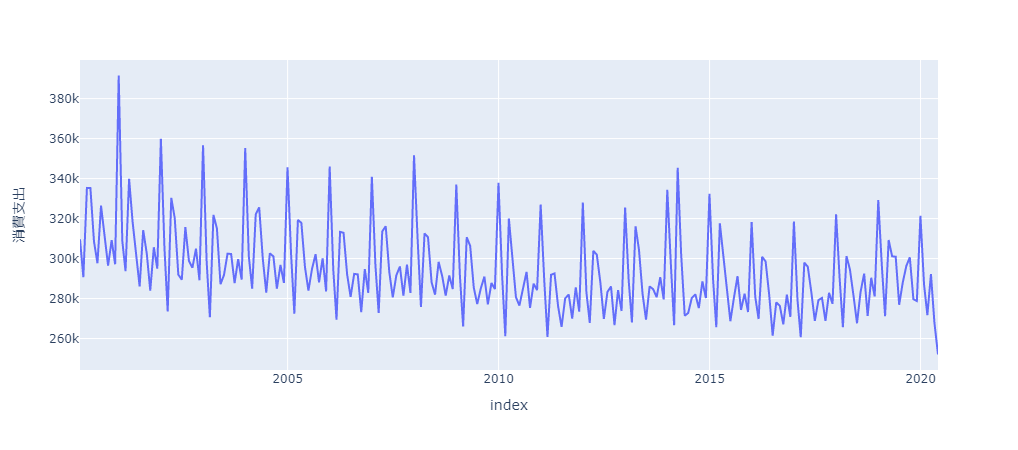

In [36]:
px.line(df2, x=df2.index, y='消費支出')